In [1]:
import pandas as pd
df=pd.read_csv("logistic_regression_dataset.csv")
df

,Age,Salary,Experience_Years,Purchased
0,56,54790,7,1
1,46,20600,3,0
2,32,55764,7,1
3,25,89543,17,1
4,38,60714,4,0
...,...,...,...,...
295,51,22114,2,0
296,38,25975,4,0
297,47,26023,4,0
298,50,36447,18,1


In [4]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
X=df[['Age','Salary','Experience_Years']]
y=df.Purchased
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.2)

In [5]:
model=LogisticRegression()
model.fit(X_train,y_train)

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [9]:
y_pred=model.predict(X_test)

In [8]:
model.predict([[32,45000,4]])

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([0])

In [10]:
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_test,y_pred)
print("Model Accuracy:",accuracy)

Model Accuracy: 0.7625


In [11]:
df['Purchased'].value_counts()

Purchased
1    175
0    125
Name: count, dtype: int64

In [12]:
df['Purchased'].value_counts().rename({0:"Not Purchased",1:"Purchased"})

Purchased
Purchased        175
Not Purchased    125
Name: count, dtype: int64

In [14]:
df["Purchased"].value_counts(normalize=True) * 100


Purchased
1    58.333333
0    41.666667
Name: proportion, dtype: float64

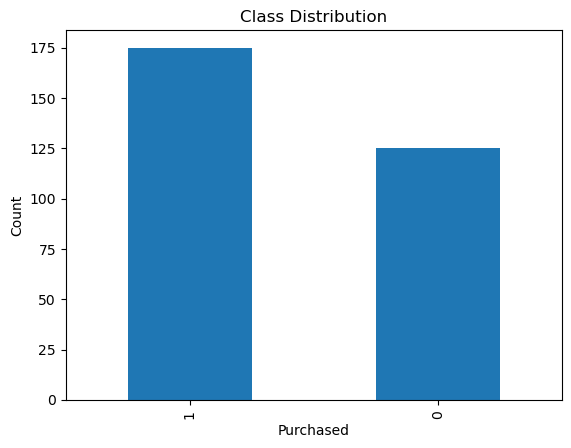

In [16]:
import matplotlib.pyplot as plt 
df['Purchased'].value_counts().plot(kind='bar')
plt.xlabel("Purchased")
plt.ylabel("Count")
plt.title("Class Distribution")
plt.show()

In [17]:
df.head()
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Age               300 non-null    int64
 1   Salary            300 non-null    int64
 2   Experience_Years  300 non-null    int64
 3   Purchased         300 non-null    int64
dtypes: int64(4)
memory usage: 9.5 KB


,Age,Salary,Experience_Years,Purchased
count,300.000000,300.000000,300.000000,300.000000
mean,38.990000,52749.610000,9.093333,0.583333
std,12.408187,21695.804982,5.887288,0.493830
min,18.000000,15301.000000,0.000000,0.000000
25%,28.000000,34164.250000,4.000000,0.000000
50%,40.000000,52460.500000,9.000000,1.000000
75%,50.000000,71507.250000,14.000000,1.000000
max,59.000000,89740.000000,19.000000,1.000000


In [19]:
df.corr()

,Age,Salary,Experience_Years,Purchased
Age,1.000000,0.023639,0.067360,0.184348
Salary,0.023639,1.000000,0.011269,0.514488
Experience_Years,0.067360,0.011269,1.000000,0.371185
Purchased,0.184348,0.514488,0.371185,1.000000


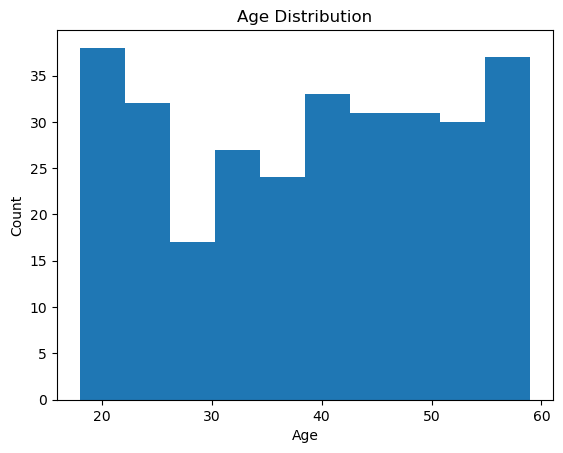

In [20]:
import matplotlib.pyplot as plt

plt.hist(df["Age"])
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()


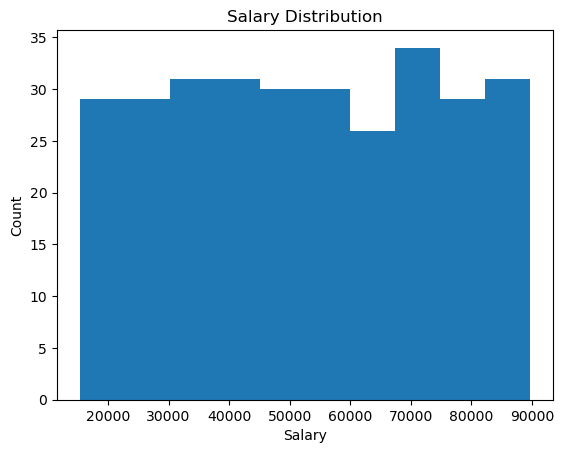

In [21]:
plt.hist(df["Salary"])
plt.title("Salary Distribution")
plt.xlabel("Salary")
plt.ylabel("Count")
plt.show()


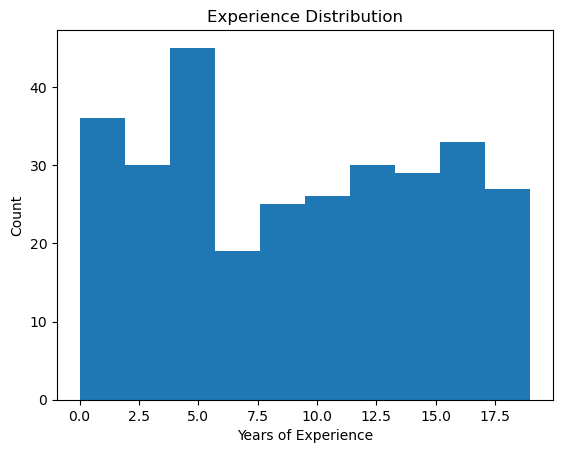

In [22]:
plt.hist(df["Experience_Years"])
plt.title("Experience Distribution")
plt.xlabel("Years of Experience")
plt.ylabel("Count")
plt.show()


<Axes: xlabel='Purchased', ylabel='Age'>

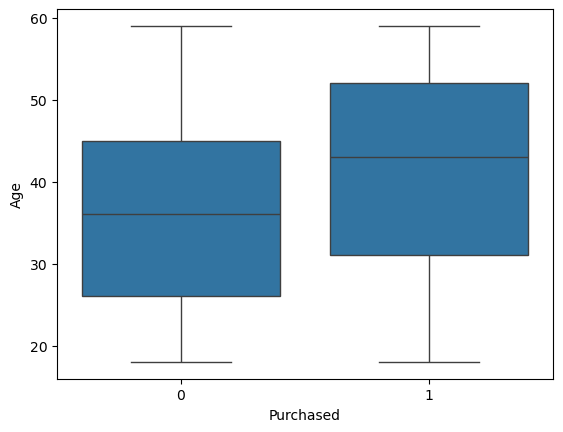

In [23]:
import seaborn as sns

sns.boxplot(x=df["Purchased"], y=df["Age"])


<Axes: xlabel='Purchased', ylabel='Salary'>

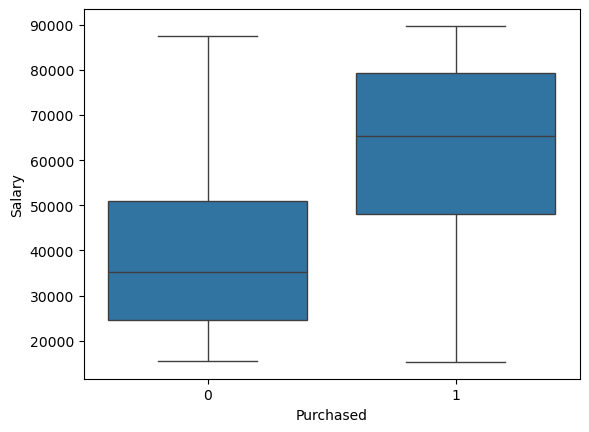

In [24]:
sns.boxplot(x=df["Purchased"], y=df["Salary"])


<Axes: xlabel='Purchased', ylabel='Experience_Years'>

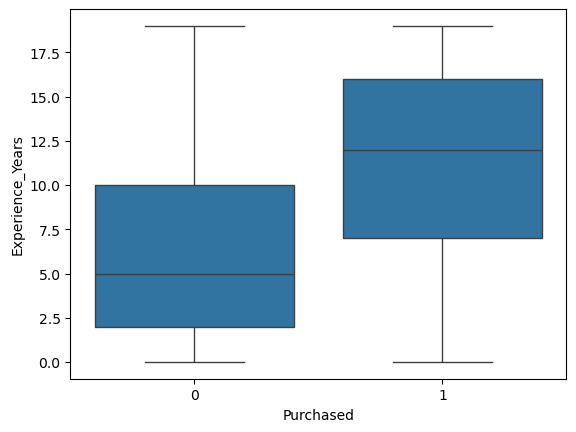

In [25]:
sns.boxplot(x=df["Purchased"], y=df["Experience_Years"])


<Axes: >

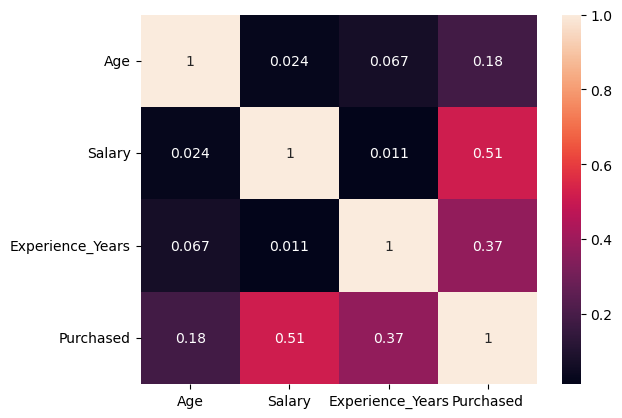

In [26]:
sns.heatmap(df.corr(), annot=True)


In [30]:
import pandas as pd

coef_df = pd.DataFrame({
    "Feature": X.columns,
    "Coefficient": model.coef_[0]
})

coef_df


,Feature,Coefficient
0,Age,0.036169
1,Salary,0.000106
2,Experience_Years,0.104460
